In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [37]:
df = pd.read_csv('NBA_stats_21_24.csv')
df.head()

,GP_2-3,MIN_2-3,PTS_2-3,FGM_2-3,FGA_2-3,FG%_2-3,3PM_2-3,3PA_2-3,3P%_2-3,FTM_2-3,...,FTA_0-1,FT%_0-1,OREB_0-1,DREB_0-1,REB_0-1,AST_0-1,STL_0-1,BLK_0-1,TOV_0-1,EFF_0-1
0,73,31.5,13.9,5.5,9.8,55.6,0.5,1.9,29.0,2.4,...,3.1,74.3,1.7,4.2,5.9,2.5,0.6,0.6,1.8,16.7
1,78,16.3,6.6,2.4,5.3,44.6,1.1,2.8,38.7,0.7,...,1.1,86.8,0.4,1.6,1.9,2.4,0.7,0.1,1.1,7.3
2,65,26.8,8.6,3.3,6.4,51.1,1.7,4.0,41.9,0.4,...,1.4,84.2,1.6,6.1,7.7,3.4,0.7,1.3,0.9,17.7
3,63,32.5,21.1,8.4,15.6,53.7,0.5,1.8,29.7,3.9,...,3.2,71.1,1.9,3.5,5.5,2.6,0.8,0.9,2.0,12.6
4,79,17.1,8.4,3.4,6.1,55.6,0.0,0.0,0.0,1.6,...,2.2,52.4,3.1,6.2,9.3,1.8,1.1,0.9,1.6,15.9


In [39]:
outliers = ((df['FG%_2-3'] > 90) |
            (df['FG%_2-3'] == 0) |
            (df['3P%_2-3'] > 90) |
            (df['3P%_2-3'] == 0) |
            (df['FT%_2-3'] == 0) |
            (df['FG%_1-2'] > 90) |
            (df['FG%_1-2'] == 0) |
            (df['3P%_1-2'] > 90) |
            (df['3P%_1-2'] == 0) |
            (df['FT%_1-2'] == 0) |
            (df['FG%_0-1'] > 90) |
            (df['FG%_0-1'] == 0) |
            (df['3P%_0-1'] > 90) |
            (df['3P%_0-1'] == 0) |
            (df['FT%_0-1'] == 0))

df = df[~outliers]

            GP_2-3   MIN_2-3   PTS_2-3   FGM_2-3   FGA_2-3   FG%_2-3  \
GP_2-3    1.000000  0.082146  0.101005  0.099876  0.076540  0.156247   
MIN_2-3   0.082146  1.000000  0.816775  0.796721  0.812714  0.174550   
PTS_2-3   0.101005  0.816775  1.000000  0.988602  0.980799  0.254135   
FGM_2-3   0.099876  0.796721  0.988602  1.000000  0.972726  0.329087   
FGA_2-3   0.076540  0.812714  0.980799  0.972726  1.000000  0.127567   
FG%_2-3   0.156247  0.174550  0.254135  0.329087  0.127567  1.000000   
3PM_2-3   0.070625  0.518201  0.480723  0.399753  0.537307 -0.406817   
3PA_2-3   0.047817  0.543621  0.522583  0.442845  0.595534 -0.461631   
3P%_2-3   0.132336  0.121311 -0.025382 -0.068379 -0.040928 -0.079151   
FTM_2-3   0.075810  0.709249  0.909869  0.871764  0.849591  0.270069   
FTA_2-3   0.059163  0.681795  0.899119  0.872356  0.828484  0.334841   
FT%_2-3   0.186356  0.340549  0.189701  0.134859  0.215240 -0.243479   
OREB_2-3 -0.044163  0.250500  0.224212  0.301100  0.155977  0.65

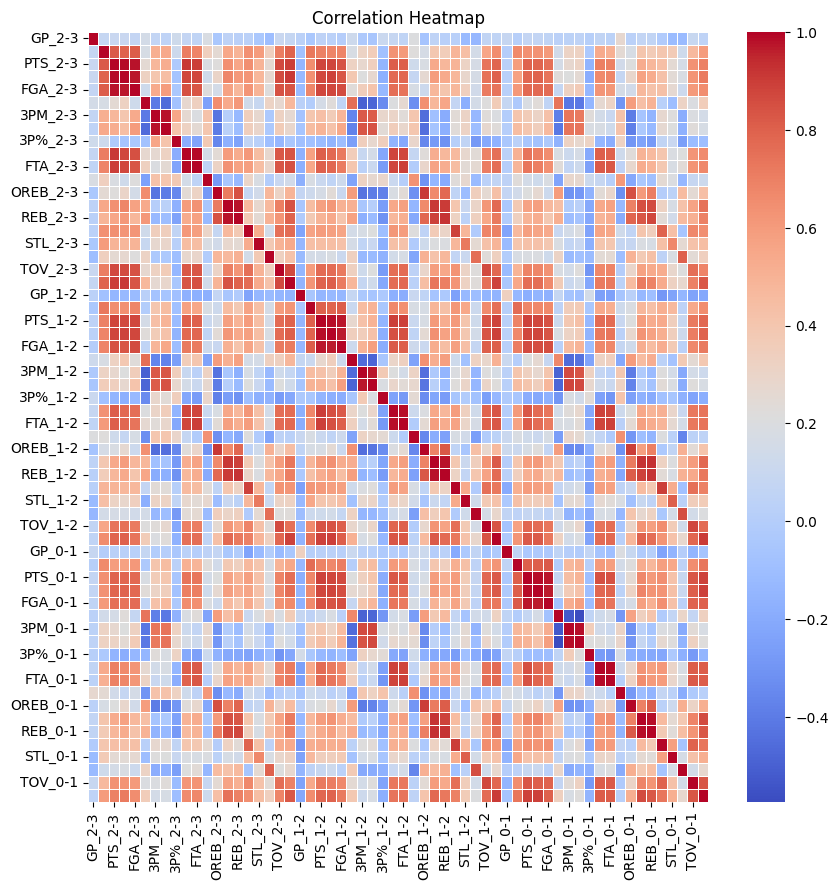

In [40]:
correlation = df.corr()
print(correlation)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_points = df
'''df_points.drop_columns = ['GP_2-3','OREB_2-3', 'DREB_2-3', 'FGM_2-3', 'FGA_2-3', '3P%_2-3', '3PA_2-3', 'FT%_2-3',
'GP_1-2','OREB_1-2', 'DREB_1-2', 'FGM_1-2', 'FGA_1-2', '3P%_1-2', '3PA_1-2', 'FT%_1-2',
'GP_0-1','OREB_0-1', 'DREB_0-1', 'FGM_0-1', 'FGA_0-1', '3P%_0-1', '3PA_0-1', 'FT%_0-1']'''

df_assists = df
df_assists.drop_columns = ['GP_2-3','OREB_2-3', 'BLK_2-3', 'FT%_2-3', '3P%_2-3', 'FG%_2-3',
'GP_1-2','OREB_1-2', 'BLK_1-2', 'FT%_1-2', '3P%_1-2', 'FG%_1-2',
'GP_0-1','OREB_0-1', 'BLK_0-1', 'FT%_0-1', '3P%_0-1', 'FG%_0-1']

In [147]:
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]
random_states = [0, 20, 42, 110, 170, 260, 370, 500]
best_score = -1
best_test_size = -1
best_random_state = -1

model_p = LinearRegression()
model_a = LinearRegression()
model_r = LinearRegression()
for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, Y_train, Y_test = train_test_split(df_points.drop(columns = ['PTS_2-3', 'AST_2-3', 'REB_2-3']), df_points[['PTS_2-3', 'AST_2-3', 'REB_2-3']], test_size=test_size, random_state=random_state)
        #X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(df_assists.drop(columns = 'AST_2-3'), df_assists['AST_2-3'], test_size=test_size, random_state=random_state)
        #X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(df.drop(columns = 'REB_2-3'), df['REB_2-3'], test_size=test_size, random_state=random_state)
        model_p.fit(X_train, Y_train)
        #model_a.fit(X_train_a, Y_train_a)
        #model_r.fit(X_train_r, Y_train_r)

        Y_pred = model_p.predict(X_test)
        if r2_score(Y_test, Y_pred) > best_score:
            best_score = r2_score(Y_test, Y_pred)
            best_test_size = test_size
            best_random_state = random_state

In [148]:
df_25 = pd.read_csv('NBA_stats_22_25.csv')
df_25.head()

,GP_2-3,MIN_2-3,PTS_2-3,FGM_2-3,FGA_2-3,FG%_2-3,3PM_2-3,3PA_2-3,3P%_2-3,FTM_2-3,...,FTA_0-1,FT%_0-1,OREB_0-1,DREB_0-1,REB_0-1,AST_0-1,STL_0-1,BLK_0-1,TOV_0-1,EFF_0-1
0,7,30.3,15.4,5.3,10.0,52.9,1.7,3.1,54.5,3.1,...,4.6,60.8,2.4,4.1,6.6,3.0,0.8,0.8,1.4,19.3
1,11,21.5,10.2,4.1,8.3,49.5,1.5,3.3,47.2,0.5,...,1.0,83.1,1.0,2.0,3.0,1.1,0.6,0.2,0.8,8.3
2,11,26.5,8.6,3.2,6.5,49.3,2.0,4.5,44.0,0.3,...,0.3,71.4,1.2,5.0,6.2,3.0,0.5,1.0,0.6,15.7
3,11,19.5,4.2,1.5,5.0,30.9,0.6,2.9,21.9,0.5,...,1.1,80.8,0.6,2.3,2.9,2.9,1.5,0.7,1.1,9.9
4,11,28.6,17.8,7.0,14.6,47.8,0.5,1.5,31.3,3.4,...,3.8,71.5,3.2,5.8,9.0,3.9,0.9,0.9,2.6,21.1


In [149]:
best_model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df_points.drop(columns = ['PTS_2-3', 'AST_2-3', 'REB_2-3']), df_points[['PTS_2-3', 'AST_2-3', 'REB_2-3']], test_size=best_test_size, random_state=best_random_state)
best_model.fit(X_train, Y_train)
Y_curr = df_25[['PTS_2-3', 'AST_2-3', 'REB_2-3']]
Y_pred1 = best_model.predict(df_25.drop(['PTS_2-3', 'AST_2-3', 'REB_2-3'], axis=1))
print(f"R2: {r2_score(Y_curr, Y_pred1)}")
for i in range(len(Y_curr)):
    print(f"Actual ppg: {Y_curr['PTS_2-3'][i]}, Predicted ppg: {Y_pred1[i][0]}")
    print(f"Actual apg: {Y_curr['AST_2-3'][i]}, Predicted apg: {Y_pred1[i][1]}")
    print(f"Actual rpg: {Y_curr['REB_2-3'][i]}, Predicted rpg: {Y_pred1[i][2]}")

R2: 0.9678479025042717
Actual ppg: 15.4, Predicted ppg: 15.53757119226444
Actual apg: 3.1, Predicted apg: 2.5809633333966424
Actual rpg: 6.7, Predicted rpg: 6.745501402746527
Actual ppg: 10.2, Predicted ppg: 10.349935563221555
Actual apg: 2.2, Predicted apg: 1.6767821453847027
Actual rpg: 4.0, Predicted rpg: 4.0574358901808685
Actual ppg: 8.6, Predicted ppg: 8.774295084628507
Actual apg: 2.4, Predicted apg: 1.6744375781578382
Actual rpg: 5.5, Predicted rpg: 5.5277527009614085
Actual ppg: 4.2, Predicted ppg: 4.0561511335386875
Actual apg: 2.3, Predicted apg: 2.1164711994637355
Actual rpg: 2.9, Predicted rpg: 2.839486004184125
Actual ppg: 17.8, Predicted ppg: 17.457692396871227
Actual apg: 3.8, Predicted apg: 3.9990152285676768
Actual rpg: 11.5, Predicted rpg: 11.36477584422285
Actual ppg: 9.7, Predicted ppg: 9.461434154551604
Actual apg: 0.4, Predicted apg: -0.11991143555563644
Actual rpg: 10.7, Predicted rpg: 9.974565031792014
Actual ppg: 7.3, Predicted ppg: 7.374499761811061
Actual ap